<a href="https://colab.research.google.com/github/Adityachauhan2344/Adityachauhan2344/blob/main/Classifiers_updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
%matplotlib inline
!pip install pandas-profiling
#import pandas_profiling as pp
import ydata_profiling

import warnings
import itertools
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as pp

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.layers import Dense, Flatten, LSTM, Input, Dropout, BatchNormalization, GRU
from tensorflow.keras import Model
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler, ModelCheckpoint
from tensorflow.keras.optimizers import Adam

sns.set_style('dark')

warnings.filterwarnings('ignore')

<ipython-input-4-6cccf8d69f18>:13: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling as pp


In [5]:
import os

# Replace 'new_directory' with the desired name of the new directory
new_directory = "../input/eeg-brainwave-dataset-feeling-emotions/"

# Create the new directory in the current working directory (usually '/content/')
os.makedirs(new_directory, exist_ok=True)

In [10]:
import shutil

# Replace 'features_raw.csv' with the file name and path of the file you want to move
file_to_move = '/content/emotions.csv.zip'

# Replace '../input/eeg-dataset/' with the destination directory path
destination_directory = '../input/eeg-brainwave-dataset-feeling-emotions/'

# Move the file to the destination directory
shutil.move(file_to_move, destination_directory)

Error: ignored

In [11]:
df = pd.read_csv('../input/eeg-brainwave-dataset-feeling-emotions/emotions.csv.zip')
df.head()

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b,label
0,4.62,30.3,-356.0,15.6,26.3,1.070,0.411,-15.70,2.06,3.15,...,23.5,20.3,20.3,23.5,-215.0,280.00,-162.00,-162.00,280.00,NEGATIVE
1,28.80,33.1,32.0,25.8,22.8,6.550,1.680,2.88,3.83,-4.82,...,-23.3,-21.8,-21.8,-23.3,182.0,2.57,-31.60,-31.60,2.57,NEUTRAL
2,8.90,29.4,-416.0,16.7,23.7,79.900,3.360,90.20,89.90,2.03,...,462.0,-233.0,-233.0,462.0,-267.0,281.00,-148.00,-148.00,281.00,POSITIVE
3,14.90,31.6,-143.0,19.8,24.3,-0.584,-0.284,8.82,2.30,-1.97,...,299.0,-243.0,-243.0,299.0,132.0,-12.40,9.53,9.53,-12.40,POSITIVE
4,28.30,31.3,45.2,27.3,24.5,34.800,-5.790,3.06,41.40,5.52,...,12.0,38.1,38.1,12.0,119.0,-17.60,23.90,23.90,-17.60,NEUTRAL


In [12]:
Y = df['label'].copy()
X = df.drop('label', axis=1).copy()

X_train, x_test, Y_train, y_test = train_test_split(X, Y,random_state=111, test_size=0.3)
X_train, x_val, Y_train, y_val=train_test_split(X_train, Y_train, random_state=111, test_size=0.3)

In [13]:
X_train = np.array(X_train).reshape((X_train.shape[0],X_train.shape[1],1))
x_test = np.array(x_test).reshape((x_test.shape[0], x_test.shape[1],1))

Y_train = pd.get_dummies(Y_train)
y_test = pd.get_dummies(y_test)
y_val = pd.get_dummies(y_val)

In [11]:
X_train.shape

(1044, 2548, 1)

In [12]:
Y_train.shape

(1044, 3)

DNN classifier


In [34]:
Y = df['label'].copy()
X = df.drop('label', axis=1).copy()

X = StandardScaler().fit_transform(X)

X_train, x_test, Y_train, y_test = train_test_split(X, Y,random_state=111, test_size=0.3)
X_train, x_val, Y_train, y_val=train_test_split(X_train, Y_train, random_state=111, test_size=0.3)

Y_train = pd.get_dummies(Y_train)
y_test = pd.get_dummies(y_test)
y_val = pd.get_dummies(y_val)

In [35]:
i_dnn = Input(shape=(2548, ))

x_dnn = Dense(2548, activation='relu')(i_dnn)
x_dnn = BatchNormalization()(x_dnn)
x_dnn = Dropout(0.25)(x_dnn)

x_dnn = Dense(3822, activation='relu')(x_dnn)
x_dnn = BatchNormalization()(x_dnn)
x_dnn = Dropout(0.27)(x_dnn)

x_dnn = Dense(5096, activation='relu')(x_dnn)
x_dnn = BatchNormalization()(x_dnn)
x_dnn = Dropout(0.3)(x_dnn)

x_dnn = Dense(3822, activation='relu')(x_dnn)
x_dnn = BatchNormalization()(x_dnn)
x_dnn = Dropout(0.27)(x_dnn)

x_dnn = Dense(2548, activation='relu')(x_dnn)
x_dnn = BatchNormalization()(x_dnn)
x_dnn = Dropout(0.25)(x_dnn)

y_dnn = Dense(3, activation='softmax')(x_dnn)

dnn_model = Model(i_dnn, y_dnn)

dnn_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 2548)]            0         
                                                                 
 dense_3 (Dense)             (None, 2548)              6494852   
                                                                 
 batch_normalization (BatchN  (None, 2548)             10192     
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 2548)              0         
                                                                 
 dense_4 (Dense)             (None, 3822)              9742278   
                                                                 
 batch_normalization_1 (Batc  (None, 3822)             15288     
 hNormalization)                                             

In [36]:
adam = Adam(learning_rate=0.001)

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, restore_best_weights=True)
mc = ModelCheckpoint('./best_dnn_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
lr_schedule = LearningRateScheduler(lambda epoch: 0.001 * np.exp(-epoch / 10.))

dnn_model.compile(optimizer=adam,
                  loss=['categorical_crossentropy'],
                  metrics=['accuracy'])

dnn_h = dnn_model.fit(X_train, Y_train,
                   batch_size=32,
                   validation_data=(x_val, y_val),
                   epochs=5,
                   callbacks=[es, mc, lr_schedule])

Epoch 1/5
33/33 [==============================] - ETA: 0s - loss: 2.1713 - accuracy: 0.7979
Epoch 1: val_accuracy improved from -inf to 0.48214, saving model to ./best_dnn_model.h5
33/33 [==============================] - 54s 1s/step - loss: 2.1713 - accuracy: 0.7979 - val_loss: 165.5958 - val_accuracy: 0.4821 - lr: 0.0010
Epoch 2/5
33/33 [==============================] - ETA: 0s - loss: 0.2611 - accuracy: 0.9176
Epoch 2: val_accuracy improved from 0.48214 to 0.58929, saving model to ./best_dnn_model.h5
33/33 [==============================] - 54s 2s/step - loss: 0.2611 - accuracy: 0.9176 - val_loss: 19.8063 - val_accuracy: 0.5893 - lr: 9.0484e-04
Epoch 3/5
33/33 [==============================] - ETA: 0s - loss: 0.3367 - accuracy: 0.9148
Epoch 3: val_accuracy improved from 0.58929 to 0.59598, saving model to ./best_dnn_model.h5
33/33 [==============================] - 61s 2s/step - loss: 0.3367 - accuracy: 0.9148 - val_loss: 9.5649 - val_accuracy: 0.5960 - lr: 8.1873e-04
Epoch 4/5
3

In [ ]:
import numpy as np

# Assuming x_test is a DataFrame
x_test_1d = x_test.values.ravel()

# Now x_test_1d is a 1D array

# Assuming you have a trained model 'model' for making predictions
# Make predictions on x_test using the trained model
y_pred = model.predict(x_test_1d)

# Convert the predictions to one-hot encoded format using pd.get_dummies()
y_pred_encoded = pd.get_dummies(y_pred)

# Now y_pred_encoded contains the predictions in one-hot encoded format


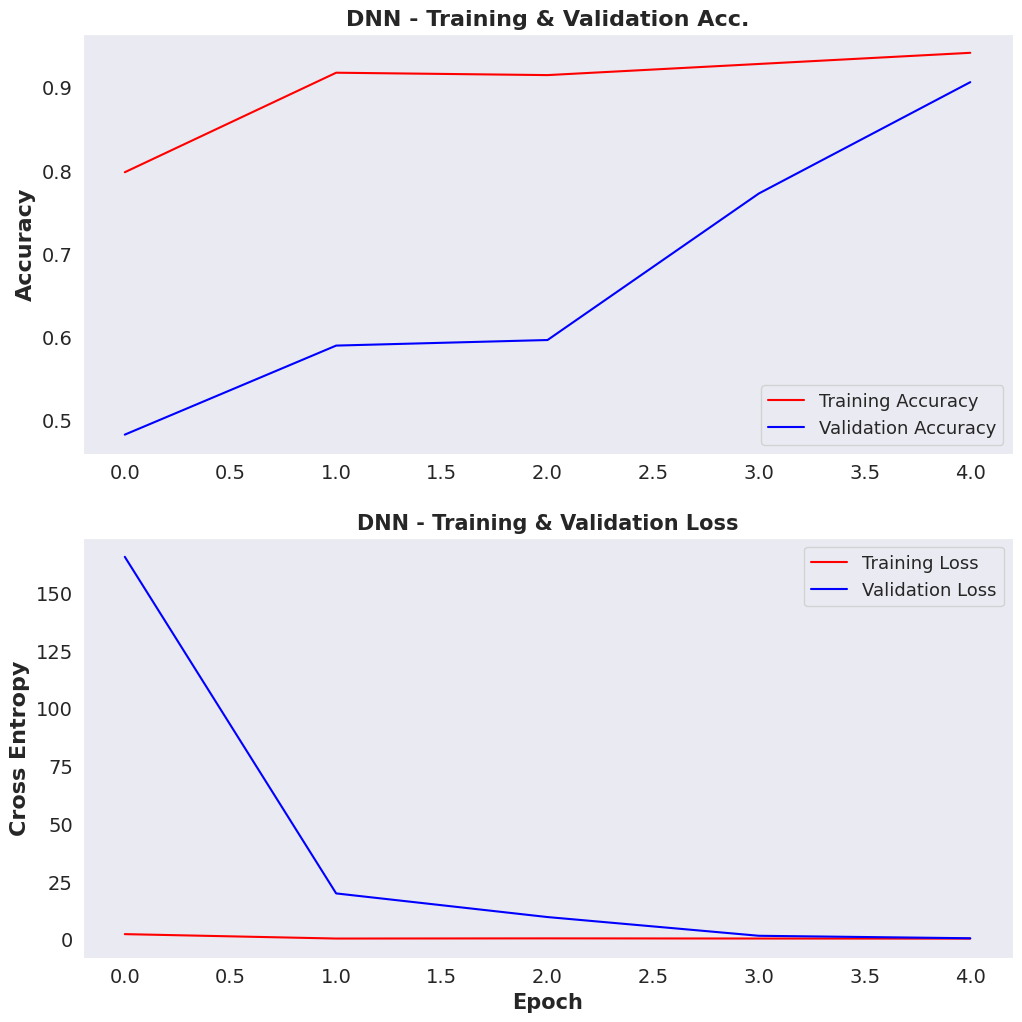

In [37]:
acc = dnn_h.history['accuracy']
val_acc = dnn_h.history['val_accuracy']

loss = dnn_h.history['loss']
val_loss = dnn_h.history['val_loss']


plt.figure(figsize=(12, 12))

plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy', color='r')
plt.plot(val_acc, label='Validation Accuracy', color='b')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='lower right', fontsize=13)
plt.ylabel('Accuracy', fontsize=16, weight='bold')
plt.title('DNN - Training & Validation Acc.', fontsize=16, weight='bold')


plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss', color='r')
plt.plot(val_loss, label='Validation Loss', color='b')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='upper right', fontsize=13)
plt.ylabel('Cross Entropy', fontsize=16, weight='bold')
plt.title('DNN - Training & Validation Loss', fontsize=15, weight='bold')
plt.xlabel('Epoch', fontsize=15, weight='bold')

plt.show()

In [38]:
dnn_best = load_model('./best_dnn_model.h5')
dnn_acc = dnn_best.evaluate(x_test, y_test, verbose=0)[1]
print("Test Acc. DNN: {:.3f}%".format(dnn_acc * 100))

Test Acc. DNN: 88.750%


In [39]:
'''from sklearn.preprocessing import LabelEncoder

# Flatten y_test to make it 1D
y_test_flat = y_test.values.ravel()

# Convert string labels to numeric format using LabelEncoder
label_encoder = LabelEncoder()
label_encoder.fit(y_test_flat)  # Fit the label encoder on flattened y_test to obtain the classes

# Transform both y_test and y_pred to numeric format using the same classes
y_test_encoded = label_encoder.transform(y_test_flat)
y_pred_encoded = label_encoder.transform(y_pred)

# Reshape y_test_encoded back to its original shape
y_test_encoded = y_test_encoded.reshape(y_test.shape)


# Calculate the confusion matrix and classification report
cm = confusion_matrix(y_test_encoded, y_pred_encoded)
print(classification_report(y_test_encoded, y_pred_encoded))'''

from sklearn.metrics import classification_report

# Predict the classes for the test dataset using the loaded DNN model
y_pred_dnn = dnn_best.predict(x_test)
y_pred_dnn_classes = np.argmax(y_pred_dnn, axis=1)

# Convert one-hot encoded y_test back to class labels
y_test_classes = np.argmax(y_test.values, axis=1)

# Calculate precision, recall, and F1 score
report = classification_report(y_test_classes, y_pred_dnn_classes)
print("Classification Report:")
print(report)




20/20 [==============================] - 3s 130ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.98      0.89       190
           1       1.00      0.89      0.94       231
           2       0.86      0.80      0.83       219

    accuracy                           0.89       640
   macro avg       0.89      0.89      0.89       640
weighted avg       0.90      0.89      0.89       640



GRU Classifier

In [14]:
from keras.layers import Input, GRU, Flatten, Dense
from keras.models import Model


i_gru = Input(shape=(X_train.shape[1], 1))

x_gru = GRU(256, return_sequences=True)(i_gru)
x_gru = Flatten()(x_gru)
y_gru = Dense(3, activation='softmax')(x_gru)

model_gru = Model(i_gru, y_gru)

model_gru.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 2548, 1)]         0         
                                                                 
 gru (GRU)                   (None, 2548, 256)         198912    
                                                                 
 flatten (Flatten)           (None, 652288)            0         
                                                                 
 dense (Dense)               (None, 3)                 1956867   
                                                                 
Total params: 2,155,779
Trainable params: 2,155,779
Non-trainable params: 0
_________________________________________________________________


In [15]:
adam = Adam(learning_rate=0.001)

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, restore_best_weights=True)
mc = ModelCheckpoint('./best_gru_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
lr_schedule = LearningRateScheduler(lambda epoch: 0.001 * np.exp(-epoch / 10.))

model_gru.compile(optimizer=adam,
                  loss=['categorical_crossentropy'],
                  metrics=['accuracy'])

gru_h = model_gru.fit(X_train, Y_train,
                   batch_size=32,
                   validation_data=(x_val, y_val),
                   epochs=5,
                   callbacks=[es, mc, lr_schedule])

Epoch 1/5
33/33 [==============================] - ETA: 0s - loss: 32.6511 - accuracy: 0.7931
Epoch 1: val_accuracy improved from -inf to 0.89509, saving model to ./best_gru_model.h5
33/33 [==============================] - 272s 8s/step - loss: 32.6511 - accuracy: 0.7931 - val_loss: 5.5228 - val_accuracy: 0.8951 - lr: 0.0010
Epoch 2/5
33/33 [==============================] - ETA: 0s - loss: 2.2145 - accuracy: 0.9253
Epoch 2: val_accuracy improved from 0.89509 to 0.92411, saving model to ./best_gru_model.h5
33/33 [==============================] - 275s 8s/step - loss: 2.2145 - accuracy: 0.9253 - val_loss: 2.7814 - val_accuracy: 0.9241 - lr: 9.0484e-04
Epoch 3/5
33/33 [==============================] - ETA: 0s - loss: 0.9170 - accuracy: 0.9607
Epoch 3: val_accuracy improved from 0.92411 to 0.93304, saving model to ./best_gru_model.h5
33/33 [==============================] - 265s 8s/step - loss: 0.9170 - accuracy: 0.9607 - val_loss: 2.6364 - val_accuracy: 0.9330 - lr: 8.1873e-04
Epoch 4/5

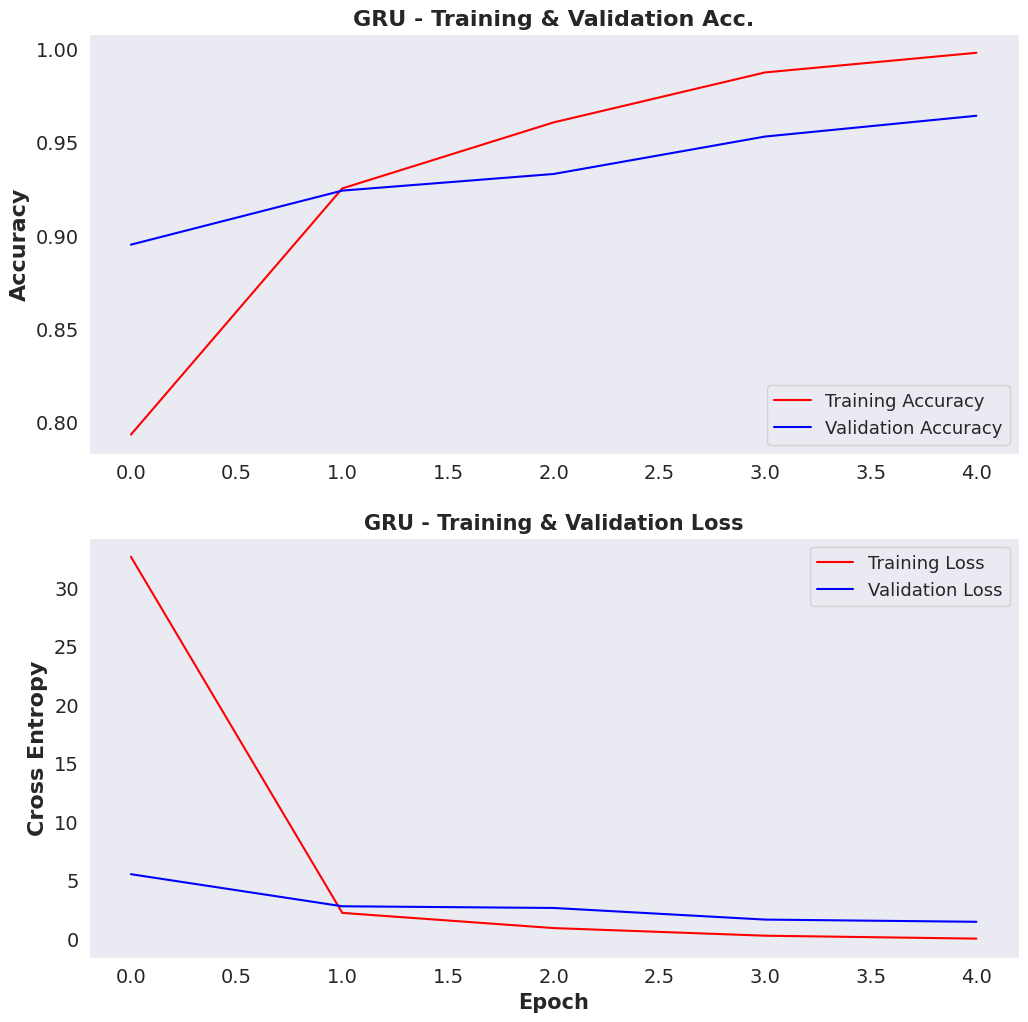

In [16]:
acc = gru_h.history['accuracy']
val_acc = gru_h.history['val_accuracy']

loss = gru_h.history['loss']
val_loss = gru_h.history['val_loss']


plt.figure(figsize=(12, 12))

plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy', color='r')
plt.plot(val_acc, label='Validation Accuracy', color='b')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='lower right', fontsize=13)
plt.ylabel('Accuracy', fontsize=16, weight='bold')
plt.title('GRU - Training & Validation Acc.', fontsize=16, weight='bold')


plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss', color='r')
plt.plot(val_loss, label='Validation Loss', color='b')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='upper right', fontsize=13)
plt.ylabel('Cross Entropy', fontsize=16, weight='bold')
plt.title('GRU - Training & Validation Loss', fontsize=15, weight='bold')
plt.xlabel('Epoch', fontsize=15, weight='bold')

plt.show()

In [17]:
gru_best = load_model('./best_gru_model.h5')
gru_acc = gru_best.evaluate(x_test, y_test, verbose=0)[1]
print("Test Acc. GRU: {:.3f}%".format(gru_acc * 100))

Test Acc. GRU: 96.250%


In [21]:
# Convert one-hot encoded y_test DataFrame to a 2D array
y_test_encoded = y_test.values

# Convert probabilities to one-hot encoded format
y_pred_gru_onehot = pd.get_dummies(y_pred_gru)

# Calculate precision, recall, and F1 score
precision_gru = precision_score(y_test_encoded, y_pred_gru_onehot, average='weighted')
recall_gru = recall_score(y_test_encoded, y_pred_gru_onehot, average='weighted')
f1_score_gru = f1_score(y_test_encoded, y_pred_gru_onehot, average='weighted')

print("GRU Model:")
print("Precision: {:.3f}".format(precision_gru))
print("Recall: {:.3f}".format(recall_gru))
print("F1 Score: {:.3f}".format(f1_score_gru))

GRU Model:
Precision: 0.962
Recall: 0.963
F1 Score: 0.962


In [18]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder

# Assuming X_train and Y_train are already defined

# Step 1: Reshape X_train to a 2D array
X_train_2d = X_train.reshape(X_train.shape[0], -1)

# Step 2: Scaling and Normalization
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_2d)

# Step 3: One-Hot Encoding
# Assuming Y_train is a pandas Series or DataFrame
# If Y_train is a numpy array, convert it to a DataFrame first
Y_train_encoded = pd.get_dummies(Y_train)

# Now X_train_scaled contains the scaled and normalized feature values
# and Y_train_encoded contains the one-hot encoded labels


In [8]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report

In [18]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [7]:
history = model.fit(X_train, Y_train, epochs=5, batch_size=32, validation_split=0.2)

NameError: ignored

In [32]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test.values, axis=1)

20/20 [==============================] - 0s 2ms/step


In [33]:
class_report = classification_report(y_test_classes, y_pred_classes)

print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.62      1.00      0.77       190
           1       0.62      0.10      0.17       231
           2       0.35      0.47      0.40       219

    accuracy                           0.50       640
   macro avg       0.53      0.52      0.45       640
weighted avg       0.53      0.50      0.43       640

